In [1]:
from utils.results import *
import torch
import matplotlib.pyplot as plt
import json

In [2]:
# settings for the plots,
dataset= 'beantec'
run= "contamination_0"  
experiment=  "Exp_18_06_24-"#,"Exp0-r18",
#category= "juice_bottle"

RESPATH="results"
DATASET=os.path.join(RESPATH, dataset)  


with open('/home/bule/projects/UTRAD/configurations/beantec.json', 'r') as file:
    conf_beantec = json.load(file)
print(list(conf_beantec['anomaly_categories'].keys()))

['01', '02', '03']


['01', '02', '03']
['01', '02', '03']
01
02
03
       Loss  Loss_scale  image_AUC  pixel_AUC category contamination setting
0  0.004843    0.011448   0.962099   0.935301       01             0   clean
1  0.004885    0.011509   0.973761   0.937967       01             0   clean
2  0.004865    0.011685   0.987366   0.940521       01             0   clean
3  0.004858    0.011396   0.975705   0.938538       01             0   clean
4  0.004860    0.011460   0.965015   0.931501       01             0   clean
0  0.003157    0.006219   0.731167   0.955043       02             0   clean
1  0.003143    0.006087   0.749333   0.953351       02             0   clean
2  0.003150    0.006058   0.773333   0.959348       02             0   clean
3  0.003150    0.006065   0.737833   0.956945       02             0   clean
4  0.003161    0.006129   0.744167   0.959002       02             0   clean
0  0.001793    0.003571   0.994512   0.993871       03             0   clean
1  0.001774    0.003499   0.9

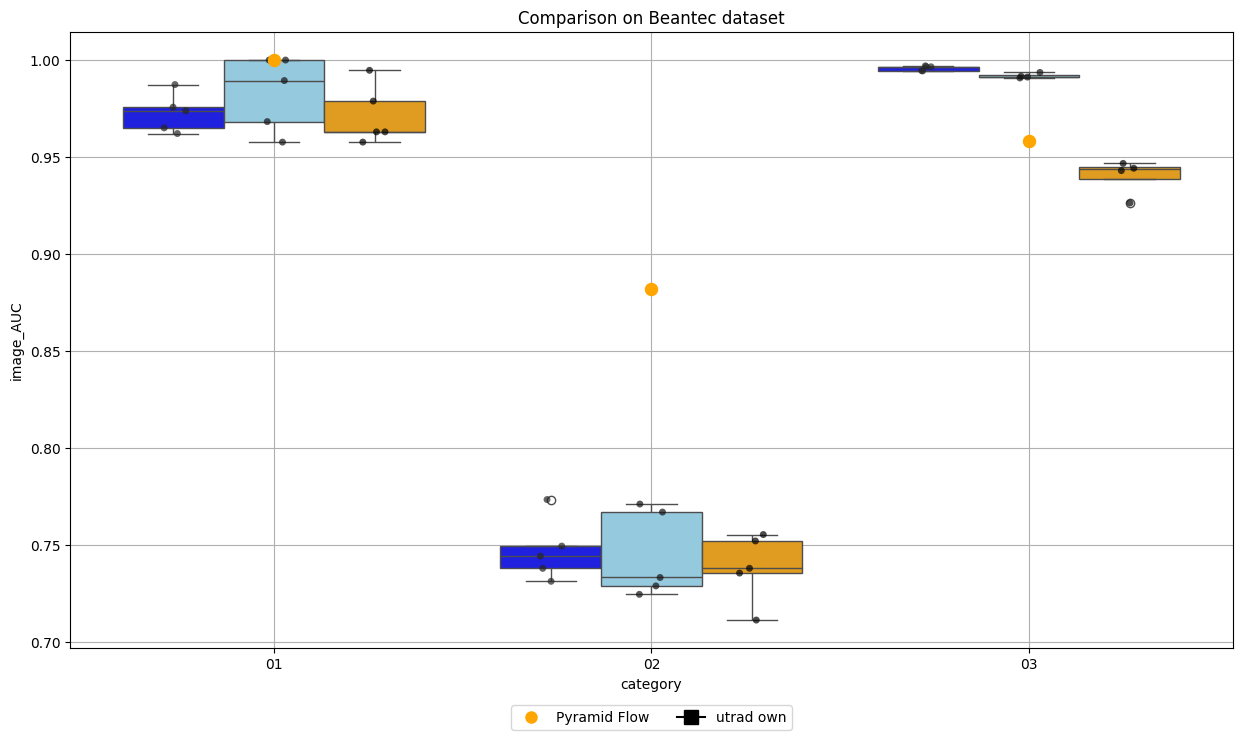

In [3]:
exp_name= "Exp_18_06_24"
category= "01"
root= '/home/bule/projects/UTRAD/results/beantec/contamination_0/'

with open('/home/bule/projects/UTRAD/configurations/beantec.json', 'r') as file:
    conf_beantec = json.load(file)
print(list(conf_beantec['anomaly_categories'].keys()))

run=1
logfile_path= os.path.join(root, f'{exp_name}_run_{run}-{category}', 'args.log')

category_list= list(conf_beantec['anomaly_categories'].keys())

print(category_list)
#category_list= ['01', '02']
run_range= np.arange(1,6)

res_df=[]
for category in category_list:
    print(category)
    logfile_paths= []
    for run in run_range:
        logfile_path= os.path.join(root, f'{exp_name}_run_{run}-{category}', 'args.log')

        if os.path.exists(logfile_path):
            if len(read_training_scores( logfile_path)['Loss'])<150:
                continue
            else:
                logfile_paths.append(logfile_path)
        
    lastrow_df=last_rows_metric(logfile_paths)
    lastrow_df['category']= [category]*len(lastrow_df)
    res_df.append(lastrow_df)
    
res_df= pd.concat(res_df)
res_df['contamination']= ['0']*len(res_df)
res_df['setting']= ['clean']*len(res_df)

print(res_df)

exp_name= "Exp_18_06_24"
root= '/home/bule/projects/UTRAD/results/beantec/contamination_10/'

run_range= np.arange(1,6)
res_df_cont=[]
for category in category_list:
    logfile_paths= []
    for run in run_range:
        logfile_path= os.path.join(root, f'{exp_name}_run_{run}-{category}', 'args.log')
        if os.path.exists(logfile_path):
            if len(read_training_scores(logfile_path)['Loss'] )>=150:
                logfile_paths.append(logfile_path)
            
        
    lastrow_df=last_rows_metric(logfile_paths)
    lastrow_df['category']= [category]*len(lastrow_df)
    res_df_cont.append(lastrow_df)
    
res_df_cont= pd.concat(res_df_cont)
res_df_cont['contamination']= ['10']*len(res_df_cont)
res_df_cont['setting']= ['contaminated']*len(res_df_cont)

print(res_df_cont)


exp_name= "Exp_18_06_24"
root= '/home/bule/projects/UTRAD/results/beantec/contamination_10/'

run_range= np.arange(1,6)
res_df_cont_c=[]
for category in category_list:
    logfile_paths= []
    for run in run_range:
        logfile_path= os.path.join(root, f'{exp_name}_run_{run}-{category}', 'args_cleaned.log')
        if os.path.exists(logfile_path):
            if len(read_training_scores(logfile_path)['Loss'] )>=150:
                logfile_paths.append(logfile_path)
            
        
    lastrow_df=last_rows_metric(logfile_paths)
    lastrow_df['category']= [category]*len(lastrow_df)
    res_df_cont_c.append(lastrow_df)
    
res_df_cont_c= pd.concat(res_df_cont_c)
res_df_cont_c['contamination']= ['10']*len(res_df_cont_c)
res_df_cont_c['setting']= ['clean_reduced']*len(res_df_cont_c)





res_df_end=pd.concat([res_df, res_df_cont,res_df_cont_c])



hue_order = ['clean', 'clean_reduced', 'contaminated']
palette = {
    'clean': 'blue',
    'clean_reduced': 'skyblue',
    'contaminated': 'orange'
}



auc_Pyramid = {'01': [1],'02': [0.882],'03': [0.958]}

# PyramidFlow: High-Resolution Defect Contrastive Localization
# using Pyramid Normalizing Flow

plt.figure(figsize=(15, 8))

ax = sns.boxplot(x="category", y="image_AUC", hue="setting", data=res_df_end,hue_order=hue_order,palette=palette)
sns.stripplot(data=res_df_end, x="category", y="image_AUC", hue="setting", dodge=True, alpha=.7, zorder=3, jitter=0.1, palette='dark:black', legend=False, ax=ax,hue_order=hue_order)

for category, auc in auc_Pyramid.items():
    ax.scatter(x=[category], y=auc, color='orange', s=75, zorder=5)


# Add custom legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Pyramid Flow', markerfacecolor='orange', markersize=10),
    plt.Line2D([0], [0], marker='s', color='black', label='utrad own', markersize=10)
]
ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.081), ncol=3)
plt.title('Comparison on Beantec dataset')
plt.grid(True)
plt.show()

In [4]:
def read_all_log_info(root= '/home/bule/projects/UTRAD/results/mvtec/',log='args.log',exp_name= "Exp_07_06",contamination='10',setting='contaminated',run_range= np.arange(1,6),postprocessing='original',CONFIG_PATH='/home/bule/projects/UTRAD/configurations/mvtec.json'):

    if log=='args_cleaned.log' and contamination=='10' and setting=='contaminated':
        raise ValueError('This function is not intended for cleaned logs with contamination 10 , setting should be clean_reduced')

    root=os.path.join(root, f'contamination_{contamination}')
    with open(CONFIG_PATH, 'r') as file:
        conf = json.load(file)

    category_list= list(conf['anomaly_categories'].keys())
    res_df=[]
    for category in category_list:
        logfile_paths= []
        runs=[]
        logfile_path_names=[]
        for run in run_range:
            
            logfile_path= os.path.join(root, f'{exp_name}_run_{run}-{str(category)}', log)
            if os.path.exists(logfile_path):
                if len(read_training_scores(logfile_path)['Loss'] )==150:
                    logfile_paths.append(logfile_path)  
                    logfile_path_names.extend([logfile_path]*150)
                    runs.extend([run]*150) 
        print(logfile_paths)
        if len(logfile_paths)==0:
            continue
        else:
            allrows_df=all_results_conc(logfile_paths)
            allrows_df['path']=logfile_path_names        
            allrows_df['run']=runs
            allrows_df['category']= [category]*len(allrows_df)
            allrows_df['postprocessing']= [postprocessing]*len(allrows_df)
            allrows_df['contamination']= [contamination]*len(allrows_df)
            allrows_df['setting']= [setting]*len(allrows_df)
            res_df.append(allrows_df)
            
    return  pd.concat(res_df)

allrows_df_end_cont=         read_all_log_info(root= '/home/bule/projects/UTRAD/results/beantec/',log='args.log',exp_name= "Exp_18_06_24",contamination='10',setting='contaminated',run_range= np.arange(1,6),postprocessing='original',CONFIG_PATH='/home/bule/projects/UTRAD/configurations/beantec.json')
allrows_df_end_clean_reduced=read_all_log_info(root= '/home/bule/projects/UTRAD/results/beantec/',log='args_cleaned.log',exp_name= "Exp_18_06_24",contamination='10',setting='clean_reduced',run_range= np.arange(1,6),postprocessing='original',CONFIG_PATH='/home/bule/projects/UTRAD/configurations/beantec.json')
allrows_df_end_clean=        read_all_log_info(root= '/home/bule/projects/UTRAD/results/beantec/',log='args.log',exp_name= "Exp_18_06_24",contamination='0',setting='clean',run_range= np.arange(1,6),postprocessing='original',CONFIG_PATH='/home/bule/projects/UTRAD/configurations/beantec.json')

allres=pd.concat([allrows_df_end_cont,allrows_df_end_clean_reduced,allrows_df_end_clean])
allres

['/home/bule/projects/UTRAD/results/beantec/contamination_10/Exp_18_06_24_run_1-01/args.log', '/home/bule/projects/UTRAD/results/beantec/contamination_10/Exp_18_06_24_run_2-01/args.log', '/home/bule/projects/UTRAD/results/beantec/contamination_10/Exp_18_06_24_run_3-01/args.log', '/home/bule/projects/UTRAD/results/beantec/contamination_10/Exp_18_06_24_run_4-01/args.log', '/home/bule/projects/UTRAD/results/beantec/contamination_10/Exp_18_06_24_run_5-01/args.log']
['/home/bule/projects/UTRAD/results/beantec/contamination_10/Exp_18_06_24_run_1-02/args.log', '/home/bule/projects/UTRAD/results/beantec/contamination_10/Exp_18_06_24_run_2-02/args.log', '/home/bule/projects/UTRAD/results/beantec/contamination_10/Exp_18_06_24_run_3-02/args.log', '/home/bule/projects/UTRAD/results/beantec/contamination_10/Exp_18_06_24_run_4-02/args.log', '/home/bule/projects/UTRAD/results/beantec/contamination_10/Exp_18_06_24_run_5-02/args.log']


['/home/bule/projects/UTRAD/results/beantec/contamination_10/Exp_18_06_24_run_1-03/args.log', '/home/bule/projects/UTRAD/results/beantec/contamination_10/Exp_18_06_24_run_3-03/args.log', '/home/bule/projects/UTRAD/results/beantec/contamination_10/Exp_18_06_24_run_4-03/args.log', '/home/bule/projects/UTRAD/results/beantec/contamination_10/Exp_18_06_24_run_5-03/args.log']
['/home/bule/projects/UTRAD/results/beantec/contamination_10/Exp_18_06_24_run_1-01/args_cleaned.log', '/home/bule/projects/UTRAD/results/beantec/contamination_10/Exp_18_06_24_run_2-01/args_cleaned.log', '/home/bule/projects/UTRAD/results/beantec/contamination_10/Exp_18_06_24_run_3-01/args_cleaned.log', '/home/bule/projects/UTRAD/results/beantec/contamination_10/Exp_18_06_24_run_4-01/args_cleaned.log', '/home/bule/projects/UTRAD/results/beantec/contamination_10/Exp_18_06_24_run_5-01/args_cleaned.log']
['/home/bule/projects/UTRAD/results/beantec/contamination_10/Exp_18_06_24_run_1-02/args_cleaned.log', '/home/bule/project

,Loss,Loss_scale,image_AUC,pixel_AUC,epoch,path,run,category,postprocessing,contamination,setting
0,0.081737,32.907894,0.645503,0.687865,0,/home/bule/projects/UTRAD/results/beantec/cont...,1,01,original,10,contaminated
1,0.059085,18.354265,0.624339,0.561493,1,/home/bule/projects/UTRAD/results/beantec/cont...,1,01,original,10,contaminated
2,0.048128,10.729018,0.481481,0.473801,2,/home/bule/projects/UTRAD/results/beantec/cont...,1,01,original,10,contaminated
3,0.040083,5.504925,0.497354,0.467771,3,/home/bule/projects/UTRAD/results/beantec/cont...,1,01,original,10,contaminated
4,0.034959,2.531582,0.555556,0.750512,4,/home/bule/projects/UTRAD/results/beantec/cont...,1,01,original,10,contaminated
...,...,...,...,...,...,...,...,...,...,...,...
745,0.001797,0.003565,0.995610,0.993849,145,/home/bule/projects/UTRAD/results/beantec/cont...,5,03,original,0,clean
746,0.001791,0.003561,0.996220,0.994111,146,/home/bule/projects/UTRAD/results/beantec/cont...,5,03,original,0,clean
747,0.001785,0.003540,0.996890,0.994059,147,/home/bule/projects/UTRAD/results/beantec/cont...,5,03,original,0,clean
748,0.001781,0.003541,0.994451,0.993843,148,/home/bule/projects/UTRAD/results/beantec/cont...,5,03,original,0,clean


### Median over the last epochs

  category  run  median_image_AUC  median_pixel_AUC  var_image_AUC  \
0       01    1          0.975705          0.939291       0.000112   
1       01    2          0.981535          0.938582       0.000103   
2       01    3          0.978620          0.938039       0.000088   
3       01    4          0.971817          0.938810       0.000046   
4       01    5          0.987366          0.937667       0.000074   

   var_pixel_AUC setting      Loss  Loss_scale  image_AUC  pixel_AUC  epoch  \
0       0.000004   clean  0.004843    0.011448   0.962099   0.935301    149   
1       0.000009   clean  0.004885    0.011509   0.973761   0.937967    149   
2       0.000006   clean  0.004865    0.011685   0.987366   0.940521    149   
3       0.000005   clean  0.004858    0.011396   0.975705   0.938538    149   
4       0.000008   clean  0.004860    0.011460   0.965015   0.931501    149   

                                                path postprocessing  \
0  /home/bule/projects/UTRAD/resu

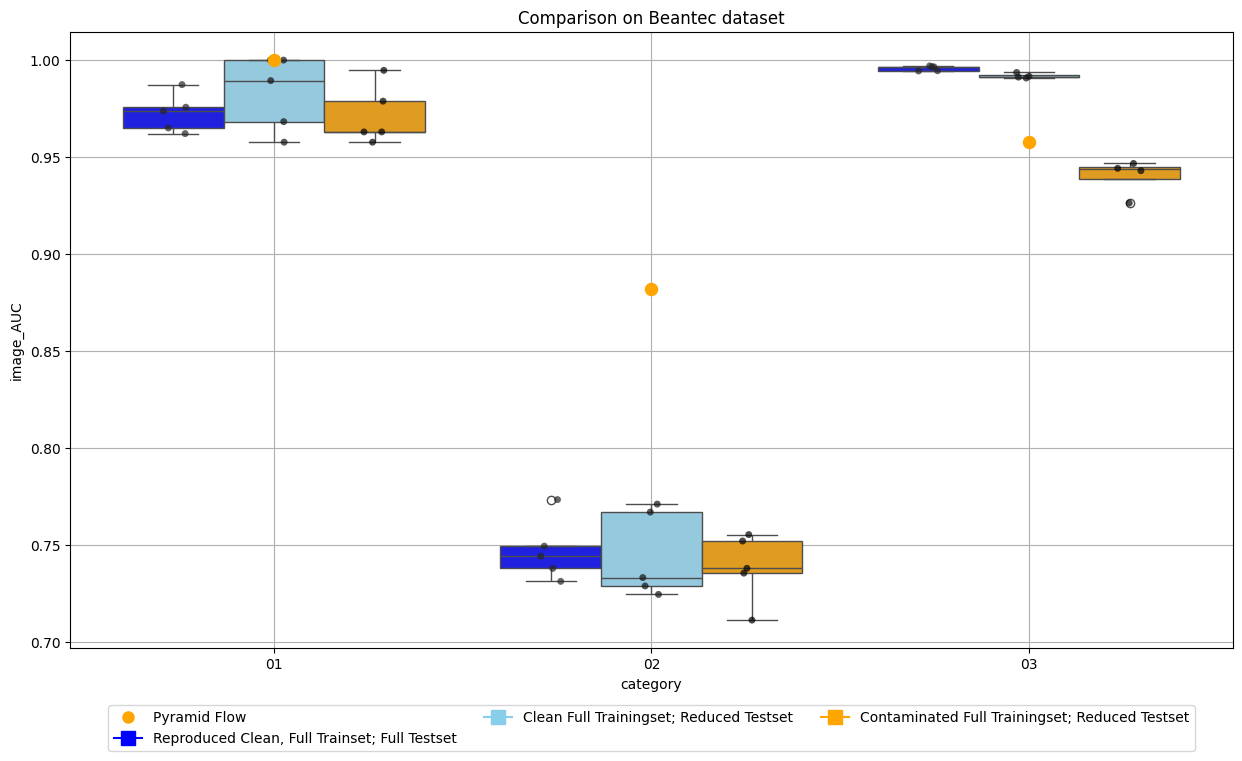

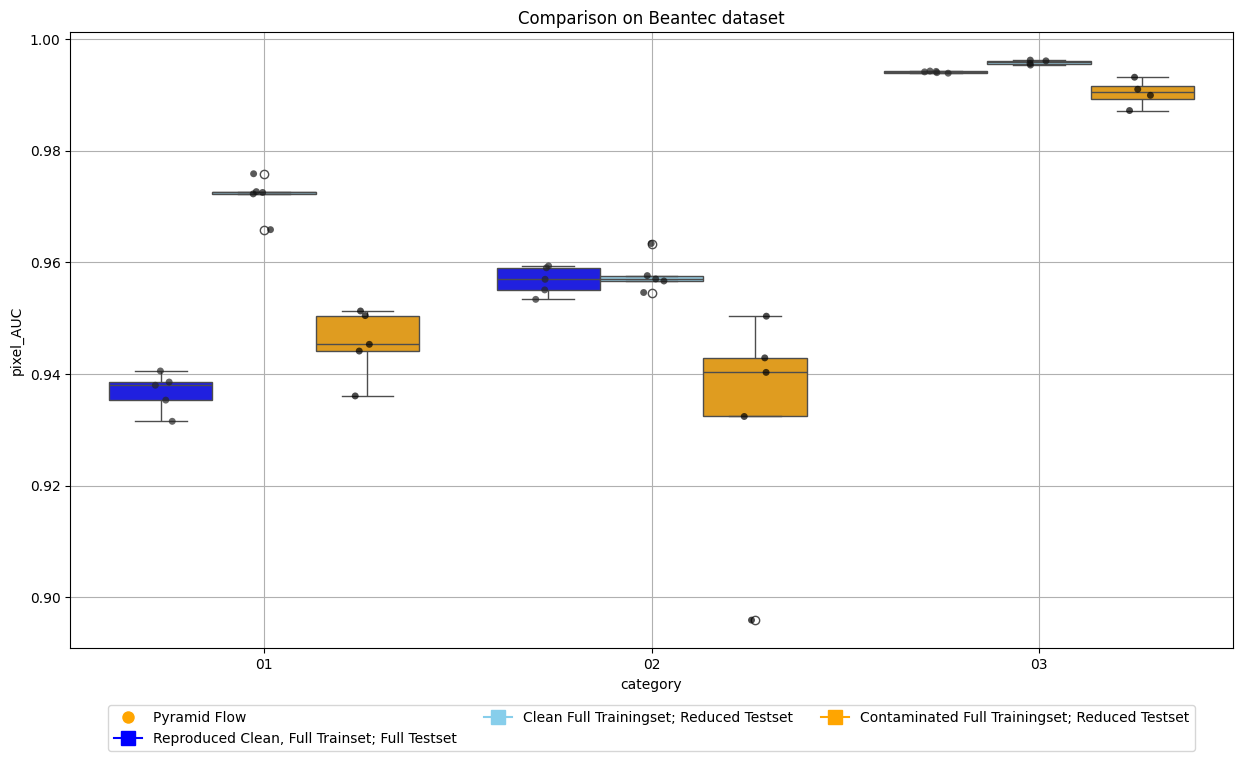

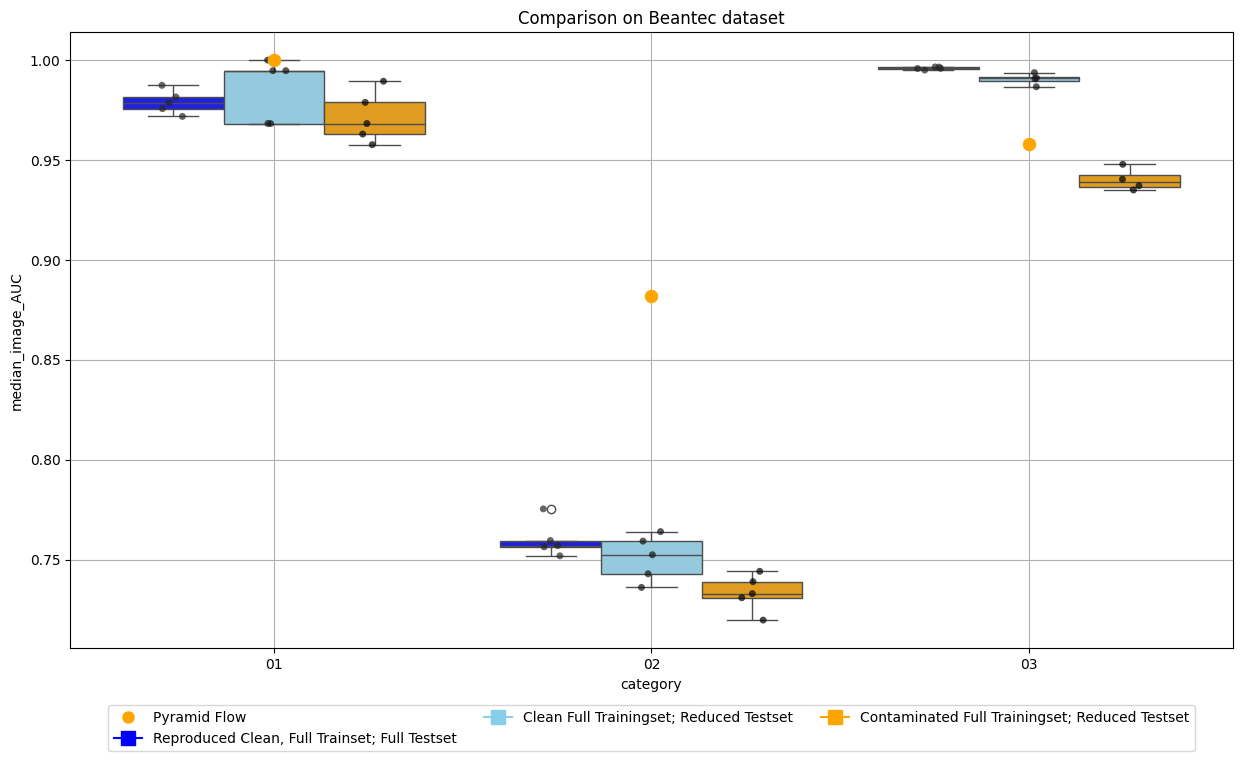

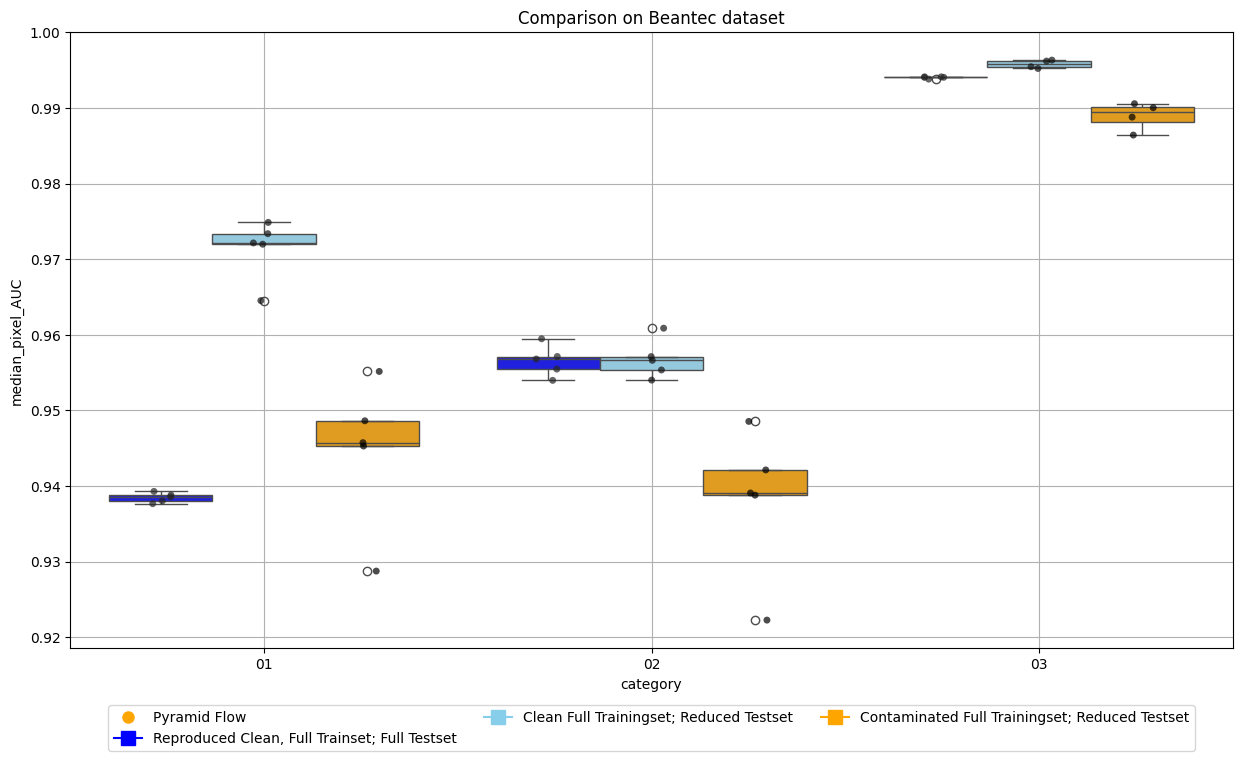

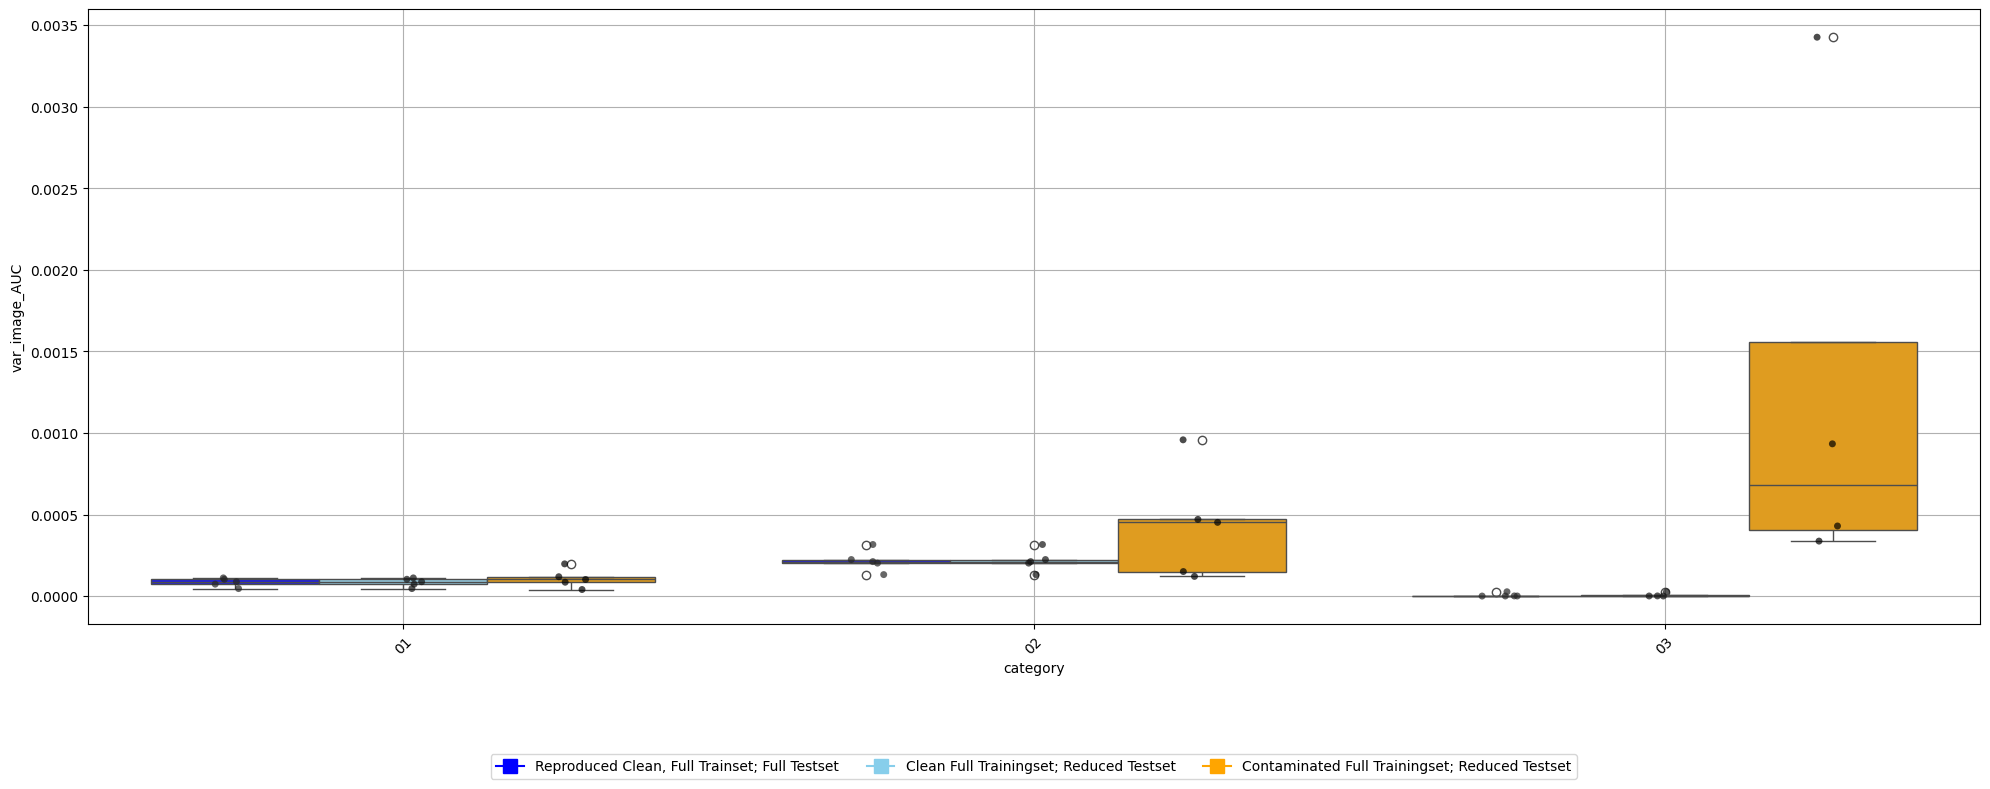

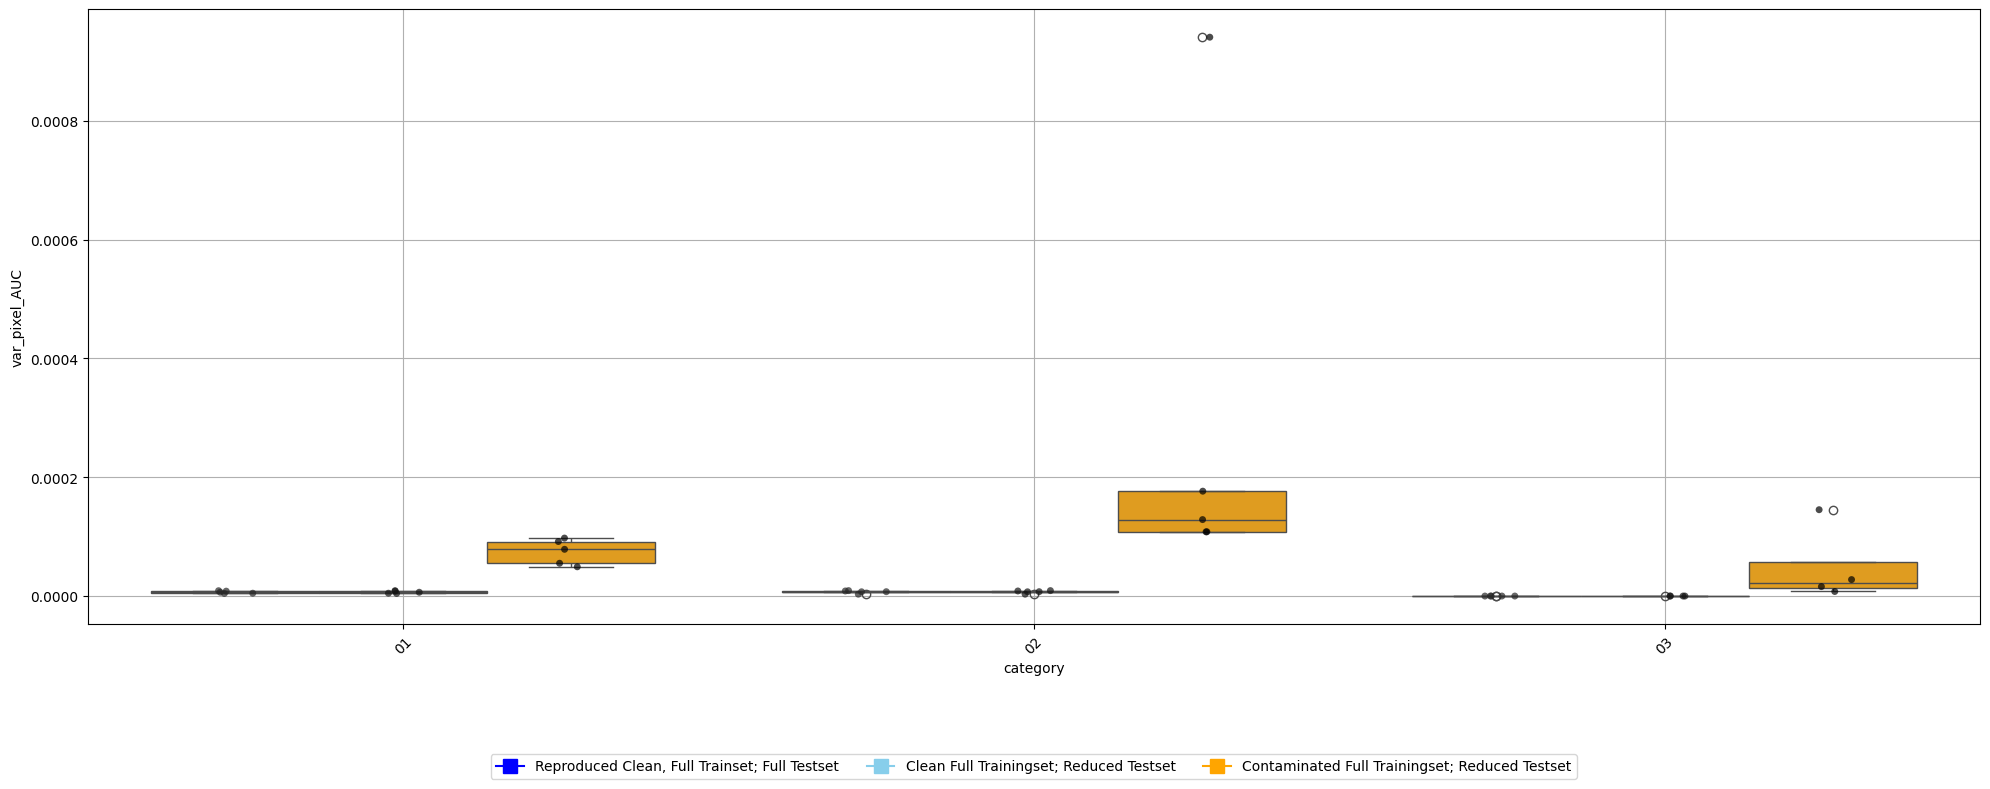

In [5]:
lasteps=allres[allres['epoch']==149]

last20=allres[allres['epoch']>=129]

# clean
last20_clean=last20[last20['setting']=='clean']
last20_clean_subset=last20_clean[['category','run','image_AUC','pixel_AUC']]

last20_clean = last20_clean_subset.groupby(['category', 'run']).median().reset_index()
last20_clean = last20_clean_subset.groupby(['category', 'run']).median().reset_index()
last20_clean['var_image_AUC']=last20_clean_subset.groupby(['category', 'run']).var().reset_index()['image_AUC']
last20_clean['var_pixel_AUC']=last20_clean_subset.groupby(['category', 'run']).var().reset_index()['pixel_AUC']
last20_clean['contamination']= ['0']*len(last20_clean)
last20_clean['setting']= ['clean']*len(last20_clean)
last20_clean['postprocessing']= ['original']*len(last20_clean)
last20_clean
# clen reduced

last20_clean_reduced=last20[last20['setting']=='clean_reduced']
last20_clean_reduced_subset=last20_clean_reduced[['category','run','image_AUC','pixel_AUC']]

last20_clean_reduced = last20_clean_reduced_subset.groupby(['category', 'run']).median().reset_index()
last20_clean_reduced['var_image_AUC']=last20_clean_subset.groupby(['category', 'run']).var().reset_index()['image_AUC']
last20_clean_reduced['var_pixel_AUC']=last20_clean_subset.groupby(['category', 'run']).var().reset_index()['pixel_AUC']

last20_clean_reduced['contamination']= ['0']*len(last20_clean_reduced)
last20_clean_reduced['setting']= ['clean_reduced']*len(last20_clean_reduced)
last20_clean_reduced['postprocessing']= ['original']*len(last20_clean_reduced)
last20_clean_reduced

# contaminated
last20_contaminated=last20[last20['setting']=='contaminated']
last20_contaminated_subset=last20_contaminated[['category','run','image_AUC','pixel_AUC']]

last20_contaminated = last20_contaminated_subset.groupby(['category', 'run']).median().reset_index()
last20_contaminated['var_image_AUC']=last20_contaminated_subset.groupby(['category', 'run']).var().reset_index()['image_AUC']
last20_contaminated['var_pixel_AUC']=last20_contaminated_subset.groupby(['category', 'run']).var().reset_index()['pixel_AUC']

last20_contaminated['contamination']= ['10']*len(last20_contaminated)
last20_contaminated['setting']= ['contaminated']*len(last20_contaminated)
last20_contaminated['postprocessing']= ['original']*len(last20_contaminated)
last20_contaminated


aggregated_df=pd.concat([last20_clean,last20_clean_reduced,last20_contaminated])

aggregated_df.rename(columns={'image_AUC': 'median_image_AUC'}, inplace=True)
aggregated_df.rename(columns={'pixel_AUC': 'median_pixel_AUC'}, inplace=True)

merged=pd.merge(aggregated_df, lasteps, on=['category', 'run','setting'], suffixes=('_aggregated', '_last'))
merged.pop('postprocessing_aggregated')
merged.pop('contamination_aggregated')
merged.rename(columns={'contamination_last': 'contamination'}, inplace=True)
merged.rename(columns={'postprocessing_last': 'postprocessing'}, inplace=True)

print(merged.head())

########################################################################################################## pixel
fulldf= merged




hue_order = ['clean', 'clean_reduced', 'contaminated']
palette = {
    'clean': 'blue',
    'clean_reduced': 'skyblue',
    'contaminated': 'orange'
}

auc_Pyramid = {'01': [1],'02': [0.882],'03': [0.958]}

# PyramidFlow: High-Resolution Defect Contrastive Localization
# using Pyramid Normalizing Flow
plt.figure(figsize=(15, 8))

ax = sns.boxplot(x="category", y="image_AUC", hue="setting", data=merged,hue_order=hue_order,palette=palette)
sns.stripplot(data=merged, x="category", y="image_AUC", hue="setting", dodge=True, alpha=.7, zorder=3, jitter=0.1, palette='dark:black', legend=False, ax=ax,hue_order=hue_order)

for category, auc in auc_Pyramid.items():
    ax.scatter(x=[category], y=auc, color='orange', s=75, zorder=5)

ax.grid(True, zorder=1)
# Add custom legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Pyramid Flow', markerfacecolor='orange', markersize=10),
    plt.Line2D([0], [0], marker='s', color='blue',  label='Reproduced Clean, Full Trainset; Full Testset', markersize=10),
    plt.Line2D([0], [0], marker='s', color='skyblue', label='Clean Full Trainingset; Reduced Testset', markersize=10),
    plt.Line2D([0], [0], marker='s', color='orange', label='Contaminated Full Trainingset; Reduced Testset', markersize=10)
]
ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.081), ncol=3)
plt.title('Comparison on Beantec dataset')
plt.grid(True)
plt.show()

plt.figure(figsize=(15, 8))

ax = sns.boxplot(x="category", y="pixel_AUC", hue="setting", data=merged,hue_order=hue_order,palette=palette)
sns.stripplot(data=merged, x="category", y="pixel_AUC", hue="setting", dodge=True, alpha=.7, zorder=3, jitter=0.1, palette='dark:black', legend=False, ax=ax,hue_order=hue_order)



ax.grid(True, zorder=1)
# Add custom legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Pyramid Flow', markerfacecolor='orange', markersize=10),
    plt.Line2D([0], [0], marker='s', color='blue',  label='Reproduced Clean, Full Trainset; Full Testset', markersize=10),
    plt.Line2D([0], [0], marker='s', color='skyblue', label='Clean Full Trainingset; Reduced Testset', markersize=10),
    plt.Line2D([0], [0], marker='s', color='orange', label='Contaminated Full Trainingset; Reduced Testset', markersize=10)
]
ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.081), ncol=3)
plt.title('Comparison on Beantec dataset')
plt.grid(True)
plt.show()


################################################################################################## median


plt.figure(figsize=(15, 8))

ax = sns.boxplot(x="category", y="median_image_AUC", hue="setting", data=merged,hue_order=hue_order,palette=palette)
sns.stripplot(data=merged, x="category", y="median_image_AUC", hue="setting", dodge=True, alpha=.7, zorder=3, jitter=0.1, palette='dark:black', legend=False, ax=ax,hue_order=hue_order)

for category, auc in auc_Pyramid.items():
    ax.scatter(x=[category], y=auc, color='orange', s=75, zorder=5)

ax.grid(True, zorder=1)
# Add custom legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Pyramid Flow', markerfacecolor='orange', markersize=10),
    plt.Line2D([0], [0], marker='s', color='blue',  label='Reproduced Clean, Full Trainset; Full Testset', markersize=10),
    plt.Line2D([0], [0], marker='s', color='skyblue', label='Clean Full Trainingset; Reduced Testset', markersize=10),
    plt.Line2D([0], [0], marker='s', color='orange', label='Contaminated Full Trainingset; Reduced Testset', markersize=10)
]
ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.081), ncol=3)
plt.title('Comparison on Beantec dataset')
plt.grid(True)
plt.show()

plt.figure(figsize=(15, 8))

ax = sns.boxplot(x="category", y="median_pixel_AUC", hue="setting", data=merged,hue_order=hue_order,palette=palette)
sns.stripplot(data=merged, x="category", y="median_pixel_AUC", hue="setting", dodge=True, alpha=.7, zorder=3, jitter=0.1, palette='dark:black', legend=False, ax=ax,hue_order=hue_order)



ax.grid(True, zorder=1)
# Add custom legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Pyramid Flow', markerfacecolor='orange', markersize=10),
    plt.Line2D([0], [0], marker='s', color='blue',  label='Reproduced Clean, Full Trainset; Full Testset', markersize=10),
    plt.Line2D([0], [0], marker='s', color='skyblue', label='Clean Full Trainingset; Reduced Testset', markersize=10),
    plt.Line2D([0], [0], marker='s', color='orange', label='Contaminated Full Trainingset; Reduced Testset', markersize=10)
]
ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.081), ncol=3)
plt.title('Comparison on Beantec dataset')
plt.grid(True)
plt.show()

################################################################################################# variances

hue_order = ['clean', 'clean_reduced', 'contaminated']



plt.figure(figsize=(20, 8))
ax = sns.boxplot(x="category", y="var_image_AUC", hue="setting",hue_order=hue_order, data=fulldf[fulldf['postprocessing']=='original'], zorder=2,palette=palette)
sns.stripplot(data=fulldf[fulldf['postprocessing']=='original'], x="category", y="var_image_AUC", hue="setting", dodge=True, alpha=.7, zorder=3, jitter=0.1, palette='dark:black', legend=False, ax=ax,hue_order=hue_order)


ax.grid(True, zorder=1)
legend_elements = [
    plt.Line2D([0], [0], marker='s', color='blue',  label='Reproduced Clean, Full Trainset; Full Testset', markersize=10),
    plt.Line2D([0], [0], marker='s', color='skyblue', label='Clean Full Trainingset; Reduced Testset', markersize=10),
    plt.Line2D([0], [0], marker='s', color='orange', label='Contaminated Full Trainingset; Reduced Testset', markersize=10)
]

ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
auc_paper = {'bottle': 0.959,'cable': 0.973,'capsule': 0.978,'carpet': 0.973,'grid': 0.976,'hazelnut': 0.984,'leather':0.986,'metal_nut': 0.95,'pill': 0.975,'screw': 0.978,'tile': 0.95,'toothbrush': 0.962,'transistor': 0.949,'wood': 0.931,'zipper': 0.979}

plt.figure(figsize=(20, 8))
ax = sns.boxplot(x="category", y="var_pixel_AUC", hue="setting", data=fulldf[fulldf['postprocessing']=='original'], zorder=2,hue_order=hue_order,palette=palette)
sns.stripplot(data=fulldf[fulldf['postprocessing']=='original'], x="category", y="var_pixel_AUC", hue="setting", dodge=True, alpha=.7, zorder=3, jitter=0.1, palette='dark:black', legend=False, ax=ax,hue_order=hue_order)


ax.grid(True, zorder=1)
legend_elements = [
    plt.Line2D([0], [0], marker='s', color='blue',  label='Reproduced Clean, Full Trainset; Full Testset', markersize=10),
    plt.Line2D([0], [0], marker='s', color='skyblue', label='Clean Full Trainingset; Reduced Testset', markersize=10),
    plt.Line2D([0], [0], marker='s', color='orange', label='Contaminated Full Trainingset; Reduced Testset', markersize=10)
]

ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=4)
plt.xticks(rotation=45)
plt.tight_layout()
plt.title
plt.show()


In [6]:
lasteps=allres[allres['epoch']==149]
conts=lasteps[lasteps['setting']=='contaminated']
cleans=lasteps[lasteps['setting']=='clean_reduced']
joined_df = pd.merge(conts, cleans, on=['run', 'category'], suffixes=('_contaminated', '_clean'))
diff=joined_df['image_AUC_clean']-joined_df['image_AUC_contaminated']
print('image_auc',diff.mean())

lasteps=allres[allres['epoch']==149]
conts=lasteps[lasteps['setting']=='contaminated']
cleans=lasteps[lasteps['setting']=='clean_reduced']
joined_df = pd.merge(conts, cleans, on=['run', 'category'], suffixes=('_contaminated', '_clean'))
diff=joined_df['pixel_AUC_clean']-joined_df['pixel_AUC_contaminated']
print('pixel_auc',diff.mean())

image_auc 0.02127335714285714
pixel_auc 0.02010092857142857


01
02
03
  category  image_median_clean  image_median_contaminated  pixel_median_clean  \
0       01            0.989418                   0.962963            0.972502   
1       02            0.733126                   0.737888            0.957003   
2       03            0.991439                   0.943585            0.995844   

   pixel_median_contaminated  image_difference  pixel_difference  \
0                   0.945294          0.011640          0.026390   
1                   0.940269          0.006501          0.025492   
2                   0.990452          0.051780          0.005500   

   t_stat_image  p_value_image  t_stat_pixel  ...  image_difference_robust  \
0     -2.060489       0.054196     -8.294590  ...                 0.013757   
1     -1.058444       0.174768     -2.636539  ...                 0.017598   
2     -9.906636       0.001094     -4.371411  ...                 0.050448   

   pixel_difference_robust  t_stat_image_robust  p_value_image_robust  \
0      

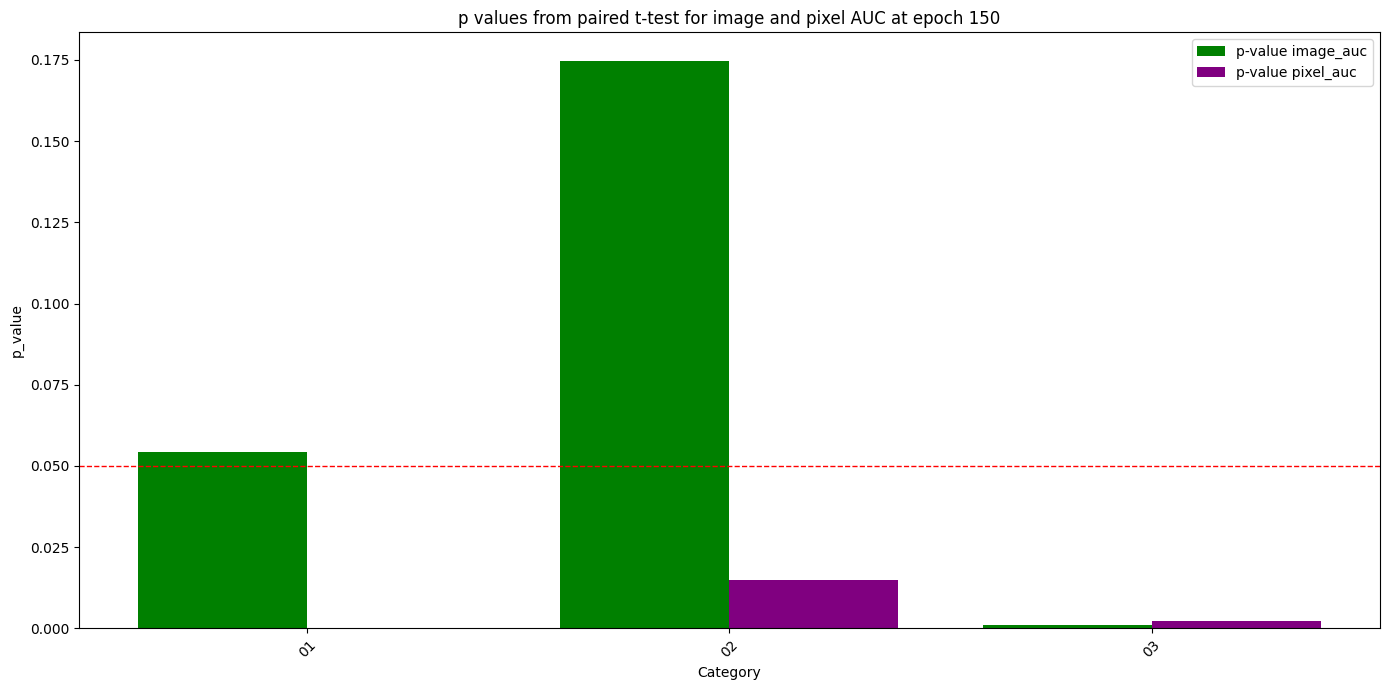

In [7]:
lasteps=merged#allres[allres['epoch']==149]
conts=lasteps[lasteps['setting']=='contaminated']
cleans=lasteps[lasteps['setting']=='clean_reduced']

# Joining the conts and cleans DataFrames on 'run' and 'category'
joined_df = pd.merge(conts, cleans, on=['run', 'category'], suffixes=('_contaminated', '_clean'))

# Displaying the result
joined_df.head()




df = paired_t_test_per_category(joined_df, 'category')
#df.to_csv('/home/bule/projects/UTRAD/results/beantec/allresults/paired_t_test_data.csv', index=False)
print(df)

# Plotting
fig, ax = plt.subplots(figsize=(14, 7))

# Width for bars
bar_width = 0.4
index = range(len(df['category']))

# p_value_image plot
ax.bar([i - bar_width/2 for i in index], df['p_value_image'], bar_width, color='green', label='p-value image_auc')

# p_value_pixel plot
ax.bar([i + bar_width/2 for i in index], df['p_value_pixel'], bar_width, color='purple', label='p-value pixel_auc')

# Adding the red dashed line at y=0.05
ax.axhline(y=0.05, color='r', linestyle='--', linewidth=1)

# Adding title and labels
ax.set_title('p values from paired t-test for image and pixel AUC at epoch 150')
ax.set_xlabel('Category')
ax.set_ylabel('p_value')
ax.set_xticks(index)
ax.set_xticklabels(df['category'])
ax.tick_params(axis='x', rotation=45)

# Adding legend
ax.legend()

plt.tight_layout()
plt.show()


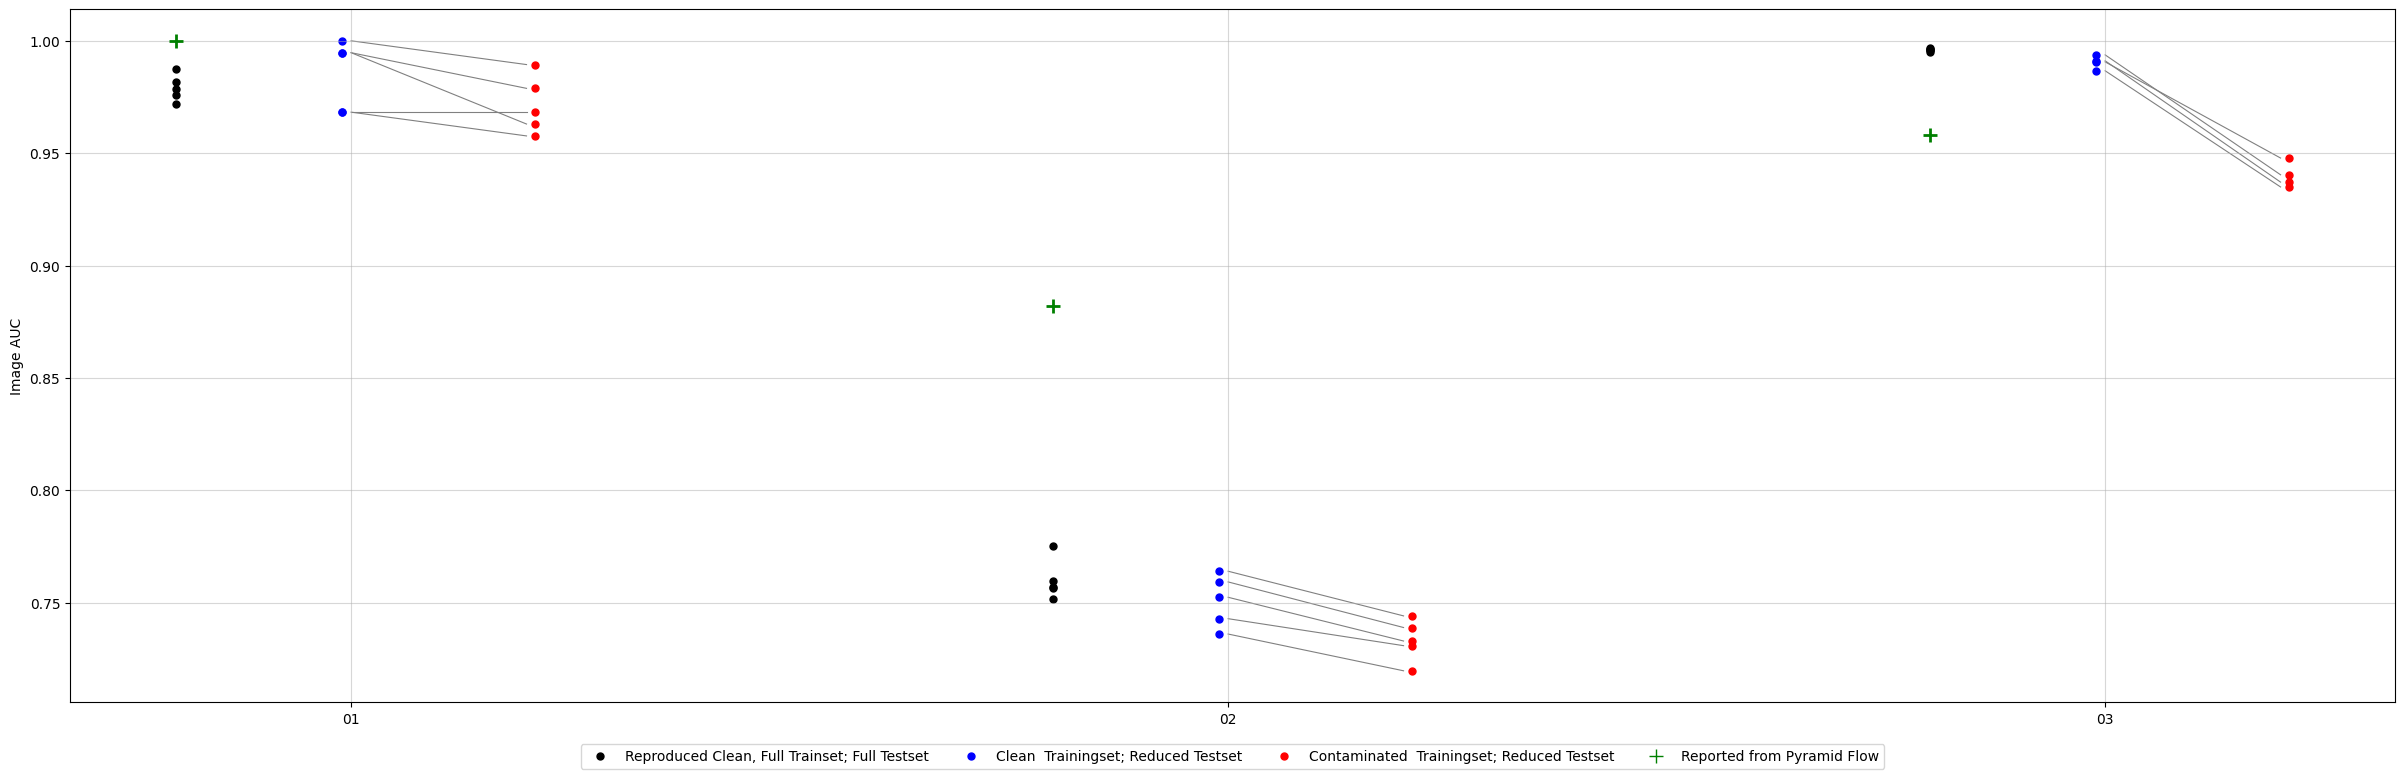

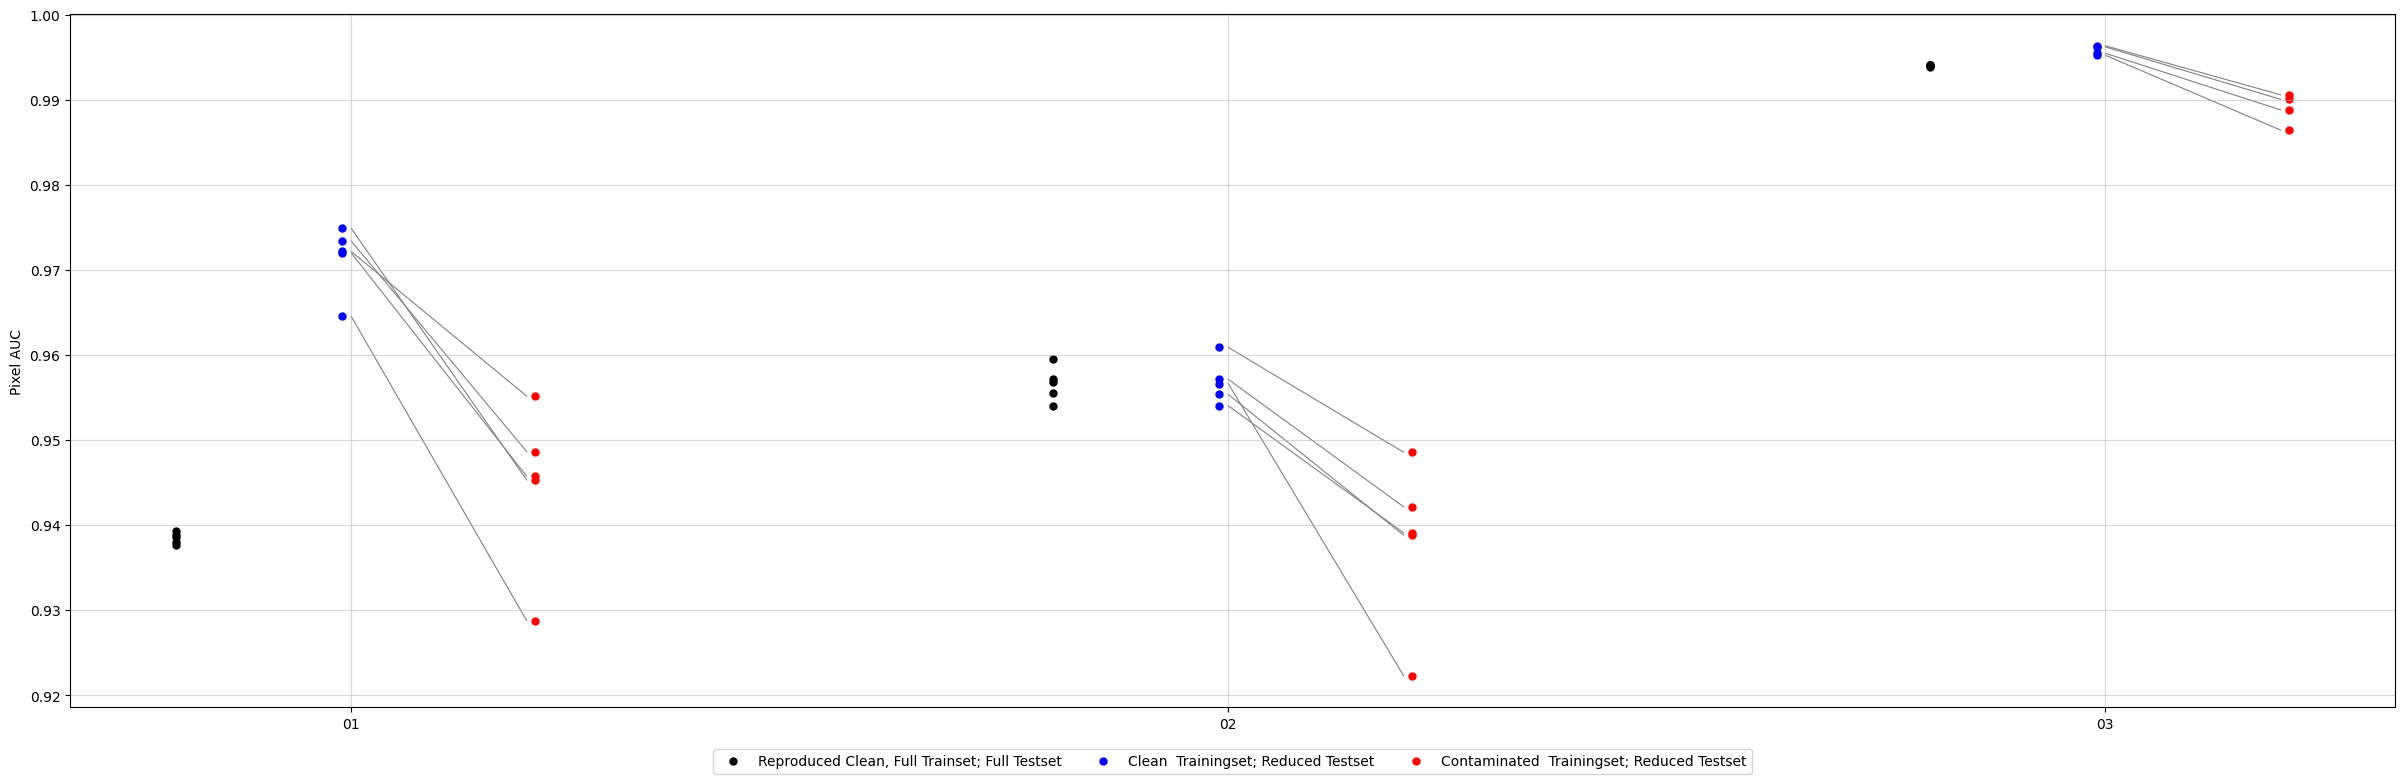

In [17]:
df=merged
fig, ax = plt.subplots(figsize=(30, 9))


auc_paper = {'01': [1],'02': [0.882],'03': [0.958]}


sites = []
i = 1
legend_added = {'clean': False, 'clean_reduced': False, 'contaminated': False}

for site, subdf in df.groupby('category'):
    sites.append(site)
    # Get the values for different settings
    h = subdf.query('setting == "clean_reduced"')['median_image_AUC'].values
    d = subdf.query('setting == "contaminated"')['median_image_AUC'].values
    clean = subdf.query('setting == "clean"')['median_image_AUC'].values

    # Ensure data completeness
    if len(h) == 0 or len(d) == 0 or len(clean) == 0:
        continue

    # Set up the x-axis values
    x1 = i + 0.0
    x2 = i + 0.2
    x0 = i -0.2

    # Plot clean data
    ax.scatter(len(clean)*[x0], clean, color='black', s=25,
               label='Clean' if not legend_added['clean'] else "")
    legend_added['clean'] = True

    # Plot the lines connecting clean_reduced and disease
    for hi, di in zip(h, d):
        ax.plot([x1, x2], [hi, di], color='gray',linewidth=0.8, zorder=1)

    # Plot clean_reduced and disease points
    ax.scatter(len(h)*[x1-0.01], h, color='blue', s=25,
               label='Clean Reduced' if not legend_added['clean_reduced'] else "")
    ax.scatter(len(d)*[x2+0.01], d, color='red', s=25,
               label='Contaminated' if not legend_added['contaminated'] else "")

    legend_added['clean_reduced'] = True
    legend_added['contaminated'] = True

    # Update x-axis
    i += 1

for category, auc in auc_paper.items():
    x_position = list(fulldf['category'].unique()).index(category) +0.8
    ax.scatter(x=x_position, y=auc, color='green', s=100, marker='+', zorder=4, linewidths=2)

legend_elements = [
    plt.Line2D([0], [0], marker='.', color='black', label='Reproduced Clean, Full Trainset; Full Testset', markersize=10, linestyle='None'),
    plt.Line2D([0], [0], marker='.', color='blue', label='Clean  Trainingset; Reduced Testset', markersize=10, linestyle='None'),
    plt.Line2D([0], [0], marker='.', color='red', label='Contaminated  Trainingset; Reduced Testset', markersize=10, linestyle='None'),
    plt.Line2D([0], [0], marker='+', color='green', label='Reported from Pyramid Flow', markersize=10, linestyle='None')
]

ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=4)

# Fix the axes and labels
ax.set_xticks(np.arange(1, len(sites) + 1))
ax.set_xticklabels(sites)
ax.set_ylabel('Image AUC')
# ax.legend()
ax.grid(True, zorder=0,alpha=0.5)
plt.show()


df=merged
fig, ax = plt.subplots(figsize=(30, 9))





sites = []
i = 1
legend_added = {'clean': False, 'clean_reduced': False, 'contaminated': False}

for site, subdf in df.groupby('category'):
    sites.append(site)
    # Get the values for different settings
    h = subdf.query('setting == "clean_reduced"')['median_pixel_AUC'].values
    d = subdf.query('setting == "contaminated"')['median_pixel_AUC'].values
    clean = subdf.query('setting == "clean"')['median_pixel_AUC'].values

    # Ensure data completeness
    if len(h) == 0 or len(d) == 0 or len(clean) == 0:
        continue

    # Set up the x-axis values
    x1 = i + 0.0
    x2 = i + 0.2
    x0 = i -0.2

    # Plot clean data
    ax.scatter(len(clean)*[x0], clean, color='black', s=25,
               label='Clean' if not legend_added['clean'] else "")
    legend_added['clean'] = True

    # Plot the lines connecting clean_reduced and disease
    for hi, di in zip(h, d):
        ax.plot([x1, x2], [hi, di], color='gray',linewidth=0.8, zorder=1)

    # Plot clean_reduced and disease points
    ax.scatter(len(h)*[x1-0.01], h, color='blue', s=25,
               label='Clean Reduced' if not legend_added['clean_reduced'] else "")
    ax.scatter(len(d)*[x2+0.01], d, color='red', s=25,
               label='Contaminated' if not legend_added['contaminated'] else "")

    legend_added['clean_reduced'] = True
    legend_added['contaminated'] = True

    # Update x-axis
    i += 1

legend_elements = [
    plt.Line2D([0], [0], marker='.', color='black', label='Reproduced Clean, Full Trainset; Full Testset', markersize=10, linestyle='None'),
    plt.Line2D([0], [0], marker='.', color='blue', label='Clean  Trainingset; Reduced Testset', markersize=10, linestyle='None'),
    plt.Line2D([0], [0], marker='.', color='red', label='Contaminated  Trainingset; Reduced Testset', markersize=10, linestyle='None'),

]

ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=4)

# Fix the axes and labels
ax.set_xticks(np.arange(1, len(sites) + 1))
ax.set_xticklabels(sites)
ax.set_ylabel('Pixel AUC')
# ax.legend()
ax.grid(True, zorder=0,alpha=0.5)
plt.show()

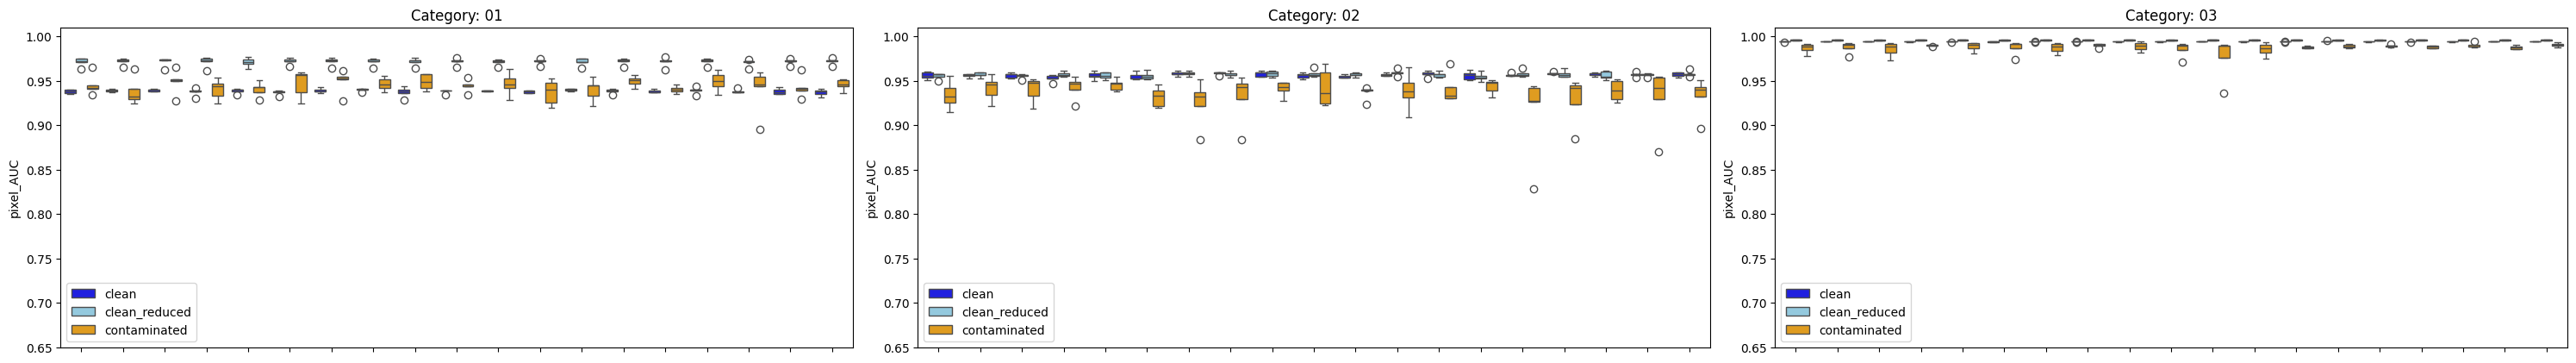

In [9]:
allres_epochs = allres[allres['epoch'] > 130]
categories =allres['category'].unique()
fig, axes = plt.subplots(5, 3, figsize=(30, 20), sharex=True)
axes = axes.flatten()
hue_order = ['clean', 'clean_reduced', 'contaminated']
palette = {
    'clean': 'blue',
    'clean_reduced': 'skyblue',
    'contaminated': 'orange'
}


for ax, category in zip(axes, categories):
    allres_cat = allres_epochs[allres_epochs['category'] == category]
    sns.boxplot(x="epoch", y="pixel_AUC", hue="setting", data=allres_cat, ax=ax,hue_order=hue_order,palette=palette)
    ax.set_title(f'Category: {category}')
    ax.legend(loc='best')
    ax.set_ylim(0.65,1.01)
for ax in axes[len(categories):]:
    ax.set_visible(False)
plt.tight_layout()
plt.show()

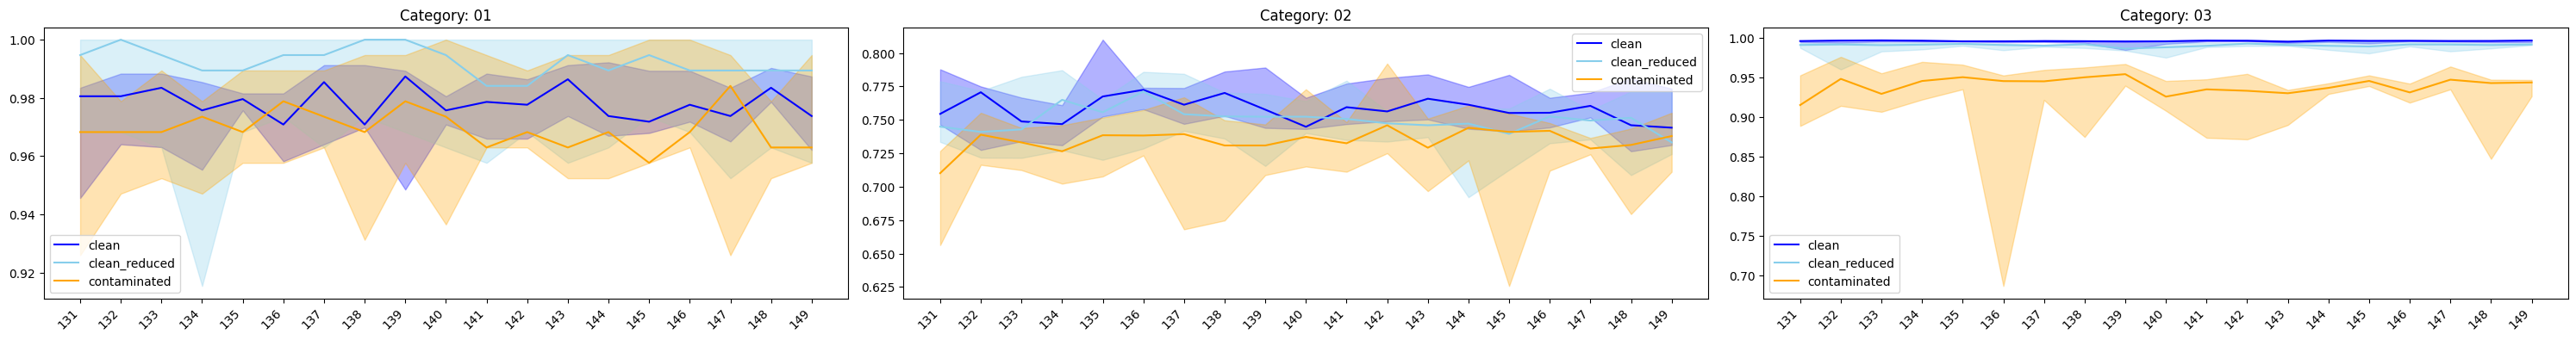

In [10]:
fig, axes = plt.subplots(5, 3, figsize=(30, 20))
axes = axes.flatten()


def calculate_stats(data):
    highest = data.groupby('epoch')['image_AUC'].max()
    lowest = data.groupby('epoch')['image_AUC'].min()
    median = data.groupby('epoch')['image_AUC'].median()
    return highest, lowest, median

for ax, category in zip(axes, categories):
    allres_cat = allres_epochs[allres_epochs['category'] == category]
    for setting in hue_order:
        data = allres_cat[allres_cat['setting'] == setting]
        highest, lowest, median = calculate_stats(data)
        epochs = highest.index
        
        ax.fill_between(epochs, lowest, highest, color=palette[setting], alpha=0.3)
        ax.plot(epochs, median, color=palette[setting], label=setting)

    ax.set_title(f'Category: {category}')
    ax.legend(loc='best')
    # ax.set_ylim(0.65, 1.01)

    # Set x-ticks and labels for each subplot
    ax.set_xticks(list(epochs))
    ax.set_xticklabels(list(epochs), rotation=45, ha='right')  # Rotate x-tick labels for better readability

# Hide any unused subplots
for ax in axes[len(categories):]:
    ax.set_visible(False)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for x-tick labels
plt.show()

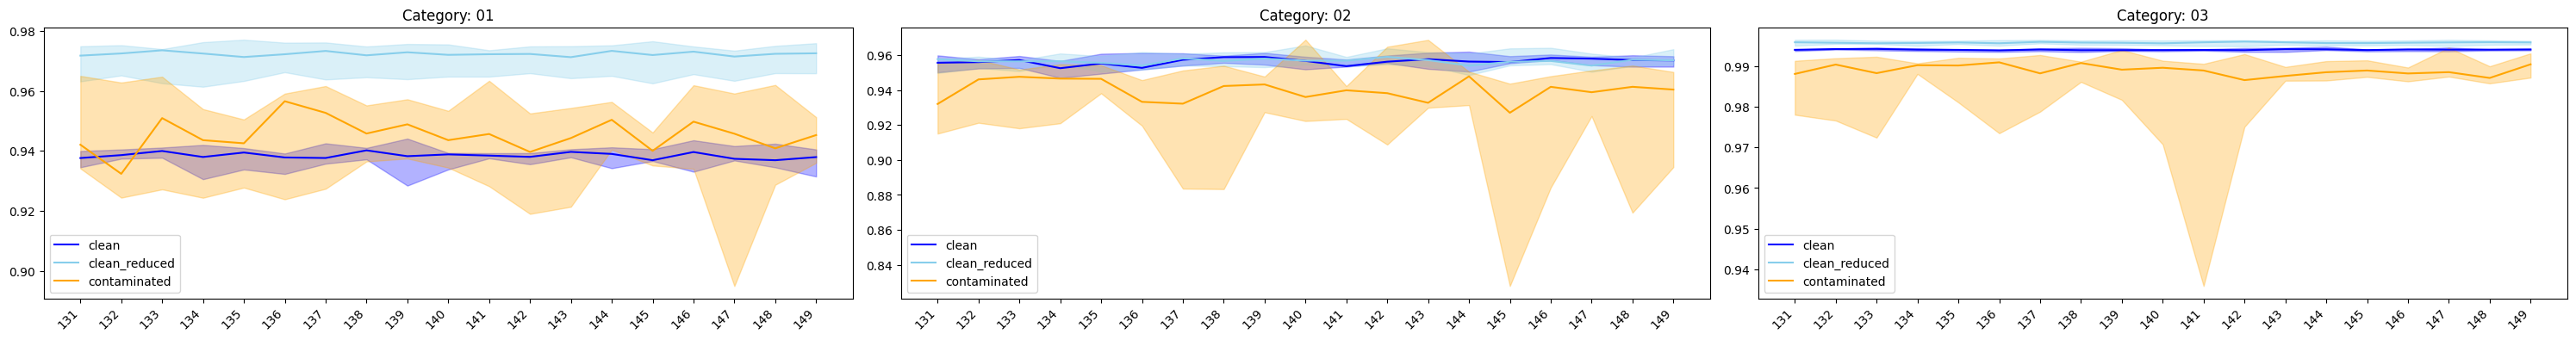

In [11]:
fig, axes = plt.subplots(5, 3, figsize=(30, 20))
axes = axes.flatten()


def calculate_stats(data):
    highest = data.groupby('epoch')['pixel_AUC'].max()
    lowest = data.groupby('epoch')['pixel_AUC'].min()
    median = data.groupby('epoch')['pixel_AUC'].median()
    return highest, lowest, median

for ax, category in zip(axes, categories):
    allres_cat = allres_epochs[allres_epochs['category'] == category]
    for setting in hue_order:
        data = allres_cat[allres_cat['setting'] == setting]
        highest, lowest, median = calculate_stats(data)
        epochs = highest.index
        
        ax.fill_between(epochs, lowest, highest, color=palette[setting], alpha=0.3)
        ax.plot(epochs, median, color=palette[setting], label=setting)

    ax.set_title(f'Category: {category}')
    ax.legend(loc='best')
    # ax.set_ylim(0.65, 1.01)

    # Set x-ticks and labels for each subplot
    ax.set_xticks(list(epochs))
    ax.set_xticklabels(list(epochs), rotation=45, ha='right')  # Rotate x-tick labels for better readability

# Hide any unused subplots
for ax in axes[len(categories):]:
    ax.set_visible(False)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for x-tick labels
plt.show()

# REmove redundatn results


In [12]:
#clean
dirs=[
'/home/bule/projects/UTRAD/results/beantec/contamination_10/Exp_18_06_24_run_1-01',
'/home/bule/projects/UTRAD/results/beantec/contamination_10/Exp_18_06_24_run_1-02',
'/home/bule/projects/UTRAD/results/beantec/contamination_10/Exp_18_06_24_run_2-01',
'/home/bule/projects/UTRAD/results/beantec/contamination_10/Exp_18_06_24_run_2-02',
'/home/bule/projects/UTRAD/results/beantec/contamination_10/Exp_18_06_24_run_3-01',
'/home/bule/projects/UTRAD/results/beantec/contamination_10/Exp_18_06_24_run_4-01',
'/home/bule/projects/UTRAD/results/beantec/contamination_10/Exp_18_06_24_run_5-01',
]


notlonglist=[]
for path in dirs:
    if len(read_training_scores(path+'/args_cleaned.log')['Loss'])<150:
        notlonglist.append(path)
notlonglist

[]

In [13]:
#10%
dirs=[

]


notlonglist=[]
for path in dirs:
    if len(read_training_scores(path+'/args.log')['Loss'])<150:
        notlonglist.append(path)
notlonglist

[]

In [14]:
import shutil
import os

# List of directories to remove
directories = [

]

# Function to remove directories
def remove_directories(dirs):
    for dir_path in dirs:
        if os.path.exists(dir_path):
            shutil.rmtree(dir_path)
            print(f"Removed directory and its contents: {dir_path}")
        else:
            print(f"Directory does not exist: {dir_path}")

# Remove the directories
remove_directories(directories)